## groupby()


#### groupby()와 함께 사용하는 집계 메소드

- count : 누락값을 제외한 데이타 수를 반환
- size : 누락값을 포함한 데이타 수를 반환
- sum
- mean
- std
- var
- min
- max
- quantile(q=0.25)
- quantile(q=0.50)
- quantile(q=0.75)
- describe
- first
- last
- nth   : n번째 행 반환
- sem   : 평균의 표준편차 반환

In [1]:
import pandas as pd

df = pd.read_excel('data/고속버스.xlsx') 
df

,차종,선별,출발지,도착지,거리,총운행횟수,총이용인원,이용율
0,우등,88선,광주,울산,327.8,412,7283,63.1
1,고속,88선,광주,울산,327.8,145,3050,46.7
2,우등,88선,광주,울산신복,327.8,164,545,11.9
3,고속,88선,광주,울산신복,327.8,70,311,9.9
4,우등,88선,광주,동대구,219.3,1369,21873,57.1
...,...,...,...,...,...,...,...,...
346,고속,호남선,청주,광주,207.5,268,4858,40.3
347,고속,호남선,청주시외,여수,290.1,21,513,54.3
348,우등,호남선,광주,전주,105.9,1802,34137,67.7
349,고속,호남선,광주,전주,105.9,1043,30394,64.8


In [13]:
# 그룹화 - '선별' 단위로 각각의 노선에 대한 총 갯수
df_group = df.groupby('선별')
type(df_group)

df_group2 = df_group.count()
df_group2
df_group2.sort_values(by='차종')



,차종,출발지,도착지,거리,총운행횟수,총이용인원,이용율
선별,,,,,,,
동해선,4,4,4,4,4,4,4
88선,18,18,18,18,18,18,18
남해선,21,21,21,21,21,21,21
경인선,25,25,25,25,25,25,25
영동선,26,26,26,26,26,26,26
구마선,30,30,30,30,30,30,30
경부선,105,105,105,105,105,105,105
호남선,122,122,122,122,122,122,122


In [15]:
%matplotlib inline

# 한글처리
from matplotlib import rc
rc('font', family='Malgun Gothic')

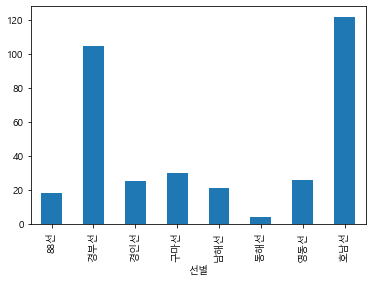

In [17]:
# 노선별 수에 대한 그래프
df_group2['차종'].plot(kind='bar')

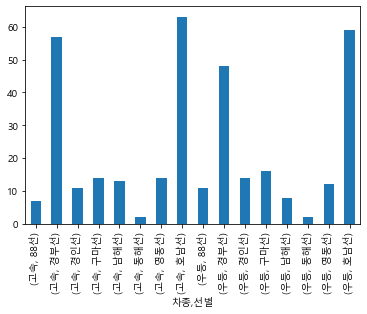

In [26]:
# 차종별, 노선별별 그룹화 작업
result = df.groupby(['차종','선별'])['총이용인원'].count()
result.plot(kind='bar')

In [27]:
# 교차테이블(cross tab) - 엑셀의 Pivot 유사
result = pd.crosstab(df['차종'],df['선별']) #첫번째 인자가 인덱스, 두번째인자가 컬럼명
result

선별,88선,경부선,경인선,구마선,남해선,동해선,영동선,호남선
차종,,,,,,,,
고속,7,57,11,14,13,2,14,63
우등,11,48,14,16,8,2,12,59


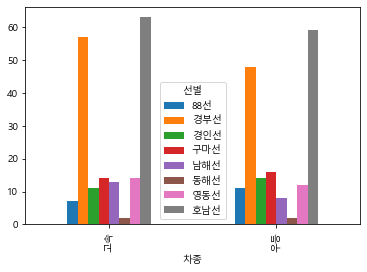

In [28]:
result.plot(kind='bar')

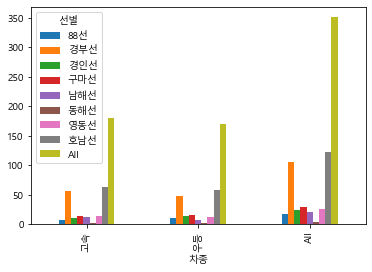

In [31]:
result = pd.crosstab(df['차종'],df['선별'],margins=True) #첫번째 인자가 인덱스, 두번째인자가 컬럼명
result.plot(kind='bar')

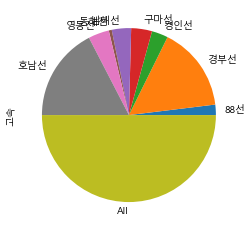

In [32]:
result.loc['고속'].plot(kind='pie')

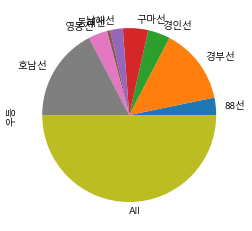

In [33]:
result.loc['우등'].plot(kind='pie')